In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

# -----------------------
k = 7 
df = pd.read_csv('Dry_Bean_Dataset.csv')



# original

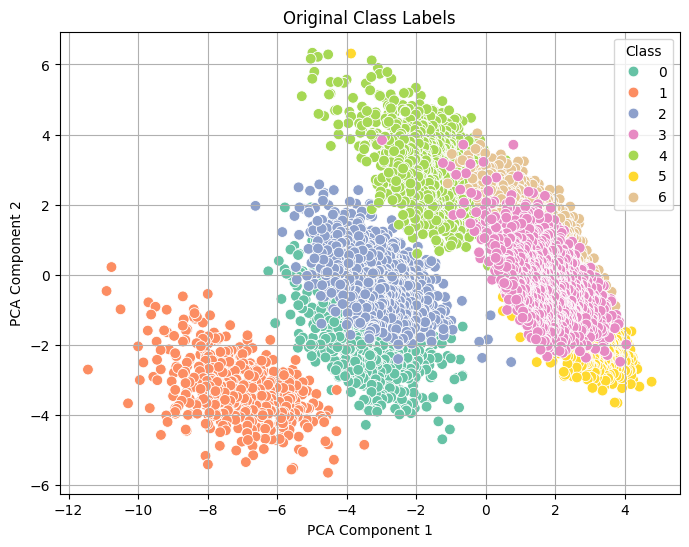

In [2]:
# 原Class标签的PCA可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=df['Class'], palette='Set2', s=60
)
plt.title('Original Class Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

# Kmeans

K = 7
Adjusted Rand Index (ARI): 0.655 
Normalized Mutual Information (NMI): 0.707 


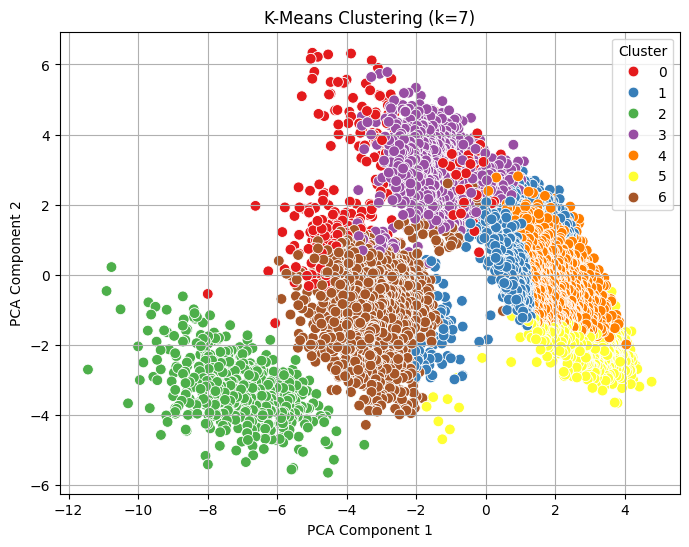

In [3]:

# KMeans 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df.drop('Class', axis=1))

# 
scaled_df_with_labels = df.copy()
scaled_df_with_labels['Cluster'] = cluster_labels

# valuation
silhouette = silhouette_score(df.drop('Class', axis=1), cluster_labels)
db_index = davies_bouldin_score(df.drop('Class', axis=1), cluster_labels)
ch_score = calinski_harabasz_score(df.drop('Class', axis=1), cluster_labels)
ari = adjusted_rand_score(df['Class'], cluster_labels)
nmi = normalized_mutual_info_score(df['Class'], cluster_labels)


print(f"K = {k}")

print(f"Adjusted Rand Index (ARI): {ari:.3f} ")
print(f"Normalized Mutual Information (NMI): {nmi:.3f} ")

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=cluster_labels, palette='Set1', s=60
)
plt.title(f"K-Means Clustering (k={k})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# GMM

K = 7
Adjusted Rand Index (ARI): 0.688 (越高越好)
Normalized Mutual Information (NMI): 0.735 (越高越好)


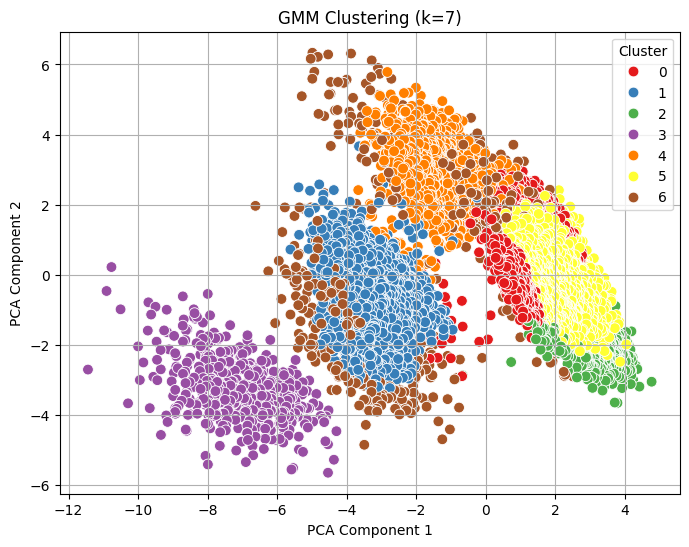

In [9]:
from sklearn.mixture import GaussianMixture

k = 7 

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=42, n_init=10)
gmm.fit(df.drop('Class', axis=1))
cluster_labels = gmm.predict(df.drop('Class', axis=1))

# 加入聚类标签
scaled_df_with_labels = df.copy()
scaled_df_with_labels['Cluster'] = cluster_labels

# 评估指标
silhouette = silhouette_score(df.drop('Class', axis=1), cluster_labels)
db_index = davies_bouldin_score(df.drop('Class', axis=1), cluster_labels)
ch_score = calinski_harabasz_score(df.drop('Class', axis=1), cluster_labels)
ari = adjusted_rand_score(df['Class'], cluster_labels)
nmi = normalized_mutual_info_score(df['Class'], cluster_labels)

# 输出结果
print(f"K = {k}")

print(f"Adjusted Rand Index (ARI): {ari:.3f} (越高越好)")
print(f"Normalized Mutual Information (NMI): {nmi:.3f} (越高越好)")

# PCA降维可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=cluster_labels, palette='Set1', s=60
)
plt.title(f"GMM Clustering (k={k})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()



# BGM

Estimated number of clusters = 7
Adjusted Rand Index (ARI): 0.688 (越高越好)
Normalized Mutual Information (NMI): 0.736 (越高越好)


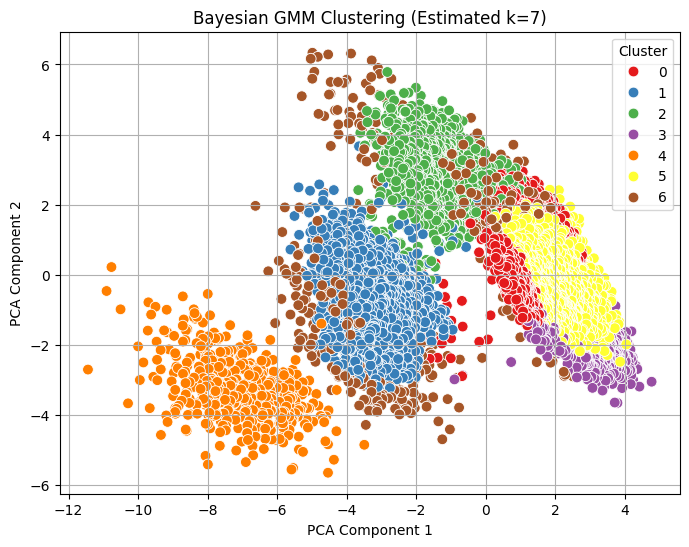

In [11]:
from sklearn.mixture import BayesianGaussianMixture

# -----------------------
max_components = 7  # 最大簇数，让模型自己决定实际簇数

# Bayesian Gaussian Mixture Model
bgm = BayesianGaussianMixture(
    n_components=max_components,
    random_state=42,
    n_init=10,
    weight_concentration_prior_type='dirichlet_process'
)
bgm.fit(df.drop('Class', axis=1))
cluster_labels = bgm.predict(df.drop('Class', axis=1))

# 实际使用的簇数
n_clusters = len(np.unique(cluster_labels))

# 加入聚类标签
scaled_df_with_labels = df.copy()
scaled_df_with_labels['Cluster'] = cluster_labels

# 评估指标
silhouette = silhouette_score(df.drop('Class', axis=1), cluster_labels)
db_index = davies_bouldin_score(df.drop('Class', axis=1), cluster_labels)
ch_score = calinski_harabasz_score(df.drop('Class', axis=1), cluster_labels)
ari = adjusted_rand_score(df['Class'], cluster_labels)
nmi = normalized_mutual_info_score(df['Class'], cluster_labels)

# 输出结果
print(f"Estimated number of clusters = {n_clusters}")

print(f"Adjusted Rand Index (ARI): {ari:.3f} (越高越好)")
print(f"Normalized Mutual Information (NMI): {nmi:.3f} (越高越好)")

# PCA降维可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=cluster_labels, palette='Set1', s=60
)
plt.title(f"Bayesian GMM Clustering (Estimated k={n_clusters})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Hierachical Clustering

K = 7
Adjusted Rand Index (ARI): 0.574 (越高越好)
Normalized Mutual Information (NMI): 0.690 (越高越好)


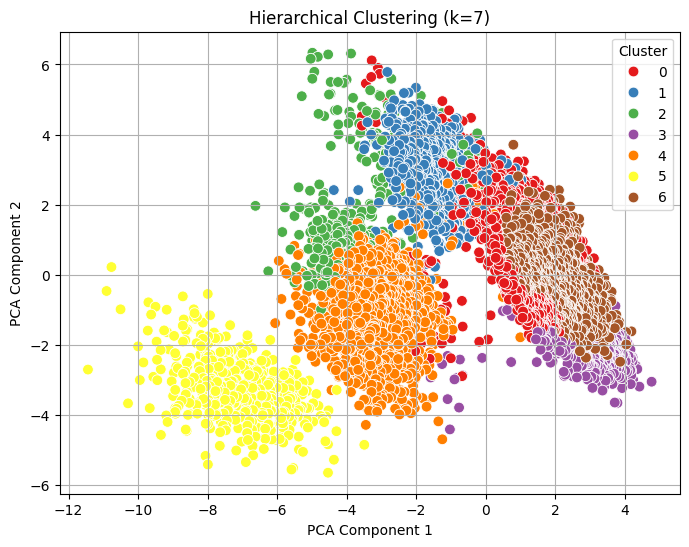

In [4]:
from sklearn.cluster import AgglomerativeClustering

# -----------------------
k = 7  # 设定簇数

# Hierarchical Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')  # linkage 可选: 'ward', 'complete', 'average', 'single'
cluster_labels = agg.fit_predict(df.drop('Class', axis=1))

# 加入聚类标签
scaled_df_with_labels = df.copy()
scaled_df_with_labels['Cluster'] = cluster_labels

# 评估指标
silhouette = silhouette_score(df.drop('Class', axis=1), cluster_labels)
db_index = davies_bouldin_score(df.drop('Class', axis=1), cluster_labels)
ch_score = calinski_harabasz_score(df.drop('Class', axis=1), cluster_labels)
ari = adjusted_rand_score(df['Class'], cluster_labels)
nmi = normalized_mutual_info_score(df['Class'], cluster_labels)

# 输出结果
print(f"K = {k}")

print(f"Adjusted Rand Index (ARI): {ari:.3f} (越高越好)")
print(f"Normalized Mutual Information (NMI): {nmi:.3f} (越高越好)")

# PCA降维可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=cluster_labels, palette='Set1', s=60
)
plt.title(f"Hierarchical Clustering (k={k})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()